## Import modules

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from cassandrautils import *

## Weather Report
#### Feature descriptions

| Feature             | Description                                                                                  |
|---------------------|----------------------------------------------------------------------------------------------|
| **location**        | The city or region of the waether forecase                                                   |
| **forecastdate**    | The date and time of the weather forecast                                                    |
| **description**     | Weather conditions                                                                           |
| **feels_like**      | The apparent temperature based on human perception, measured in Kelvin                       |
| **humidity**        | The percentage of moisture in the air (0-100%)                                               |
| **pressure**        | Atmospheric pressure at sea level in hPa (hectopascals)                                      |
| **sunrise**         | The timestamp of the sunrise time, in Unix format                                            |
| **sunset**          | The timestamp of the sunset time, in Unix format                                             |
| **temp**            | The current temperature in Kelvin                                                            |
| **temp_max**        | The maximum temperature forecast for the day in Kelvin                                       |
| **temp_min**        | The minimum temperature forecast for the day in Kelvin                                       |
| **wind**            | The wind speed in meters per second                                                          |
| **forecast_timestamp** | The timestamp when the forecast data was recorded or generated                            |


In [2]:
weather = getWeatherDF()
weather['forecast_timestamp'] = pd.to_datetime(weather['forecastdate'], format="%d-%m-%Y %H:%M")
print("Weather from ", weather['forecast_timestamp'].min(), " To ", weather['forecast_timestamp'].max())

Weather from  2024-11-26 04:02:32  To  2024-11-27 10:39:33


In [18]:
weather.head()

,location,forecastdate,description,feels_like,humidity,pressure,sunrise,sunset,temp,temp_max,temp_min,wind,forecast_timestamp
0,New York,2024-11-26 04:03:00,overcast clouds,282.140015,60.0,1016.0,1732535702,1732570303,283.480011,284.450012,281.079987,3.13,2024-11-26 04:03:00
1,New York,2024-11-26 04:03:57,overcast clouds,282.140015,60.0,1016.0,1732535702,1732570303,283.480011,284.450012,281.079987,3.13,2024-11-26 04:03:57
2,New York,2024-11-26 04:04:54,overcast clouds,282.140015,60.0,1016.0,1732535702,1732570303,283.480011,284.450012,281.079987,3.13,2024-11-26 04:04:54
3,New York,2024-11-26 04:05:51,overcast clouds,282.209991,61.0,1016.0,1732535702,1732570303,283.519989,284.450012,281.119995,3.13,2024-11-26 04:05:51
4,New York,2024-11-26 04:06:47,overcast clouds,282.209991,61.0,1016.0,1732535702,1732570303,283.519989,284.450012,281.119995,3.13,2024-11-26 04:06:47


In [19]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   location            239 non-null    object        
 1   forecastdate        239 non-null    datetime64[ns]
 2   description         239 non-null    object        
 3   feels_like          239 non-null    float64       
 4   humidity            239 non-null    float64       
 5   pressure            239 non-null    float64       
 6   sunrise             239 non-null    int64         
 7   sunset              239 non-null    int64         
 8   temp                239 non-null    float64       
 9   temp_max            239 non-null    float64       
 10  temp_min            239 non-null    float64       
 11  wind                239 non-null    float64       
 12  forecast_timestamp  239 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(7), int64(2), object

#### Weather Data Recorded By Location in Kelvin

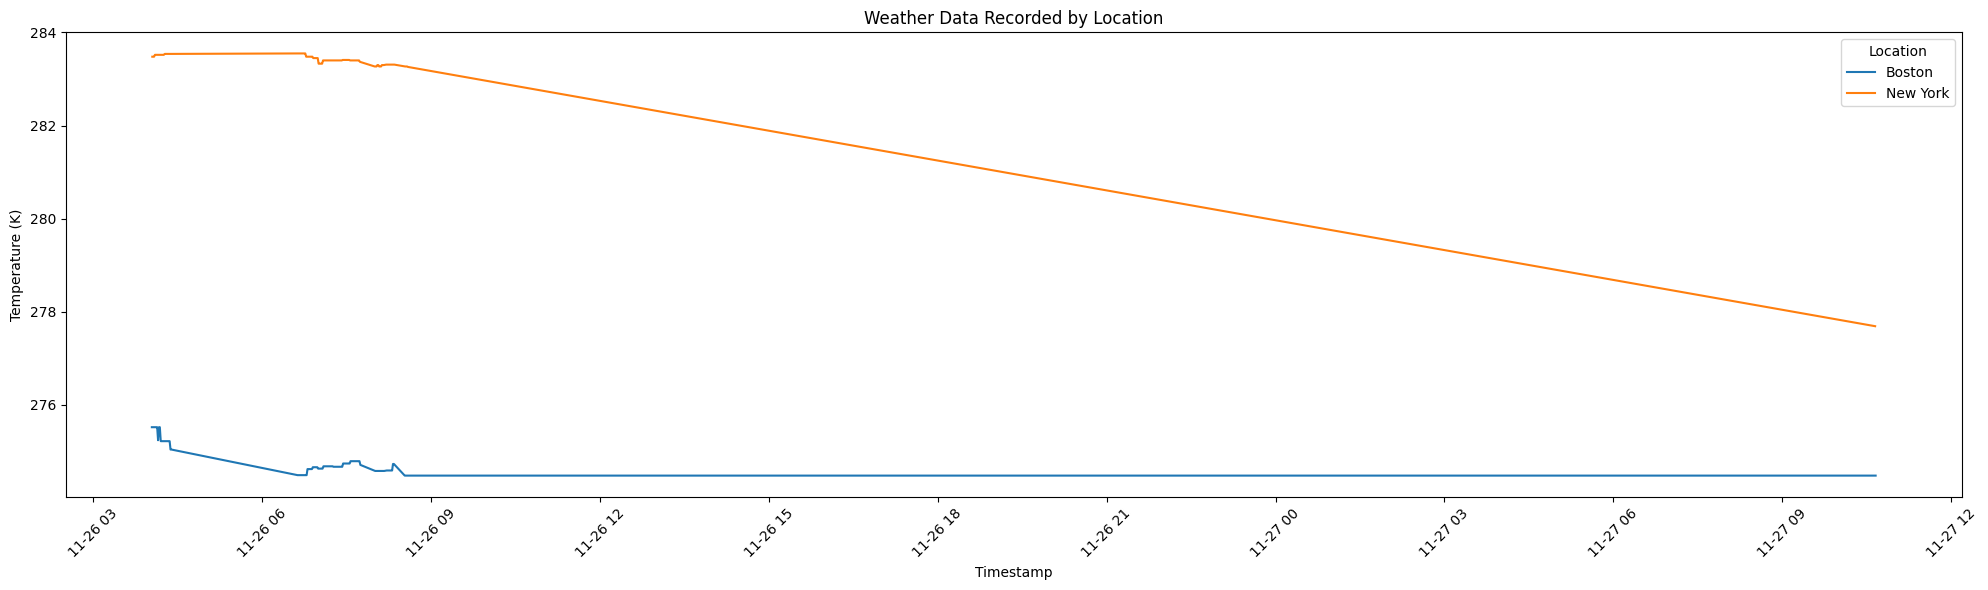

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,6))

# Group the data by 'location' and plot the temperature for each location
for location, group in weather.groupby('location'):
    plt.plot(group['forecast_timestamp'], group['temp'], label=location)

plt.xlabel("Timestamp")
plt.ylabel("Temperature (K)") 
plt.title("Weather Data Recorded by Location")
plt.legend(title='Location')

plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

#### Weather Data Recorded By Location in Celcius

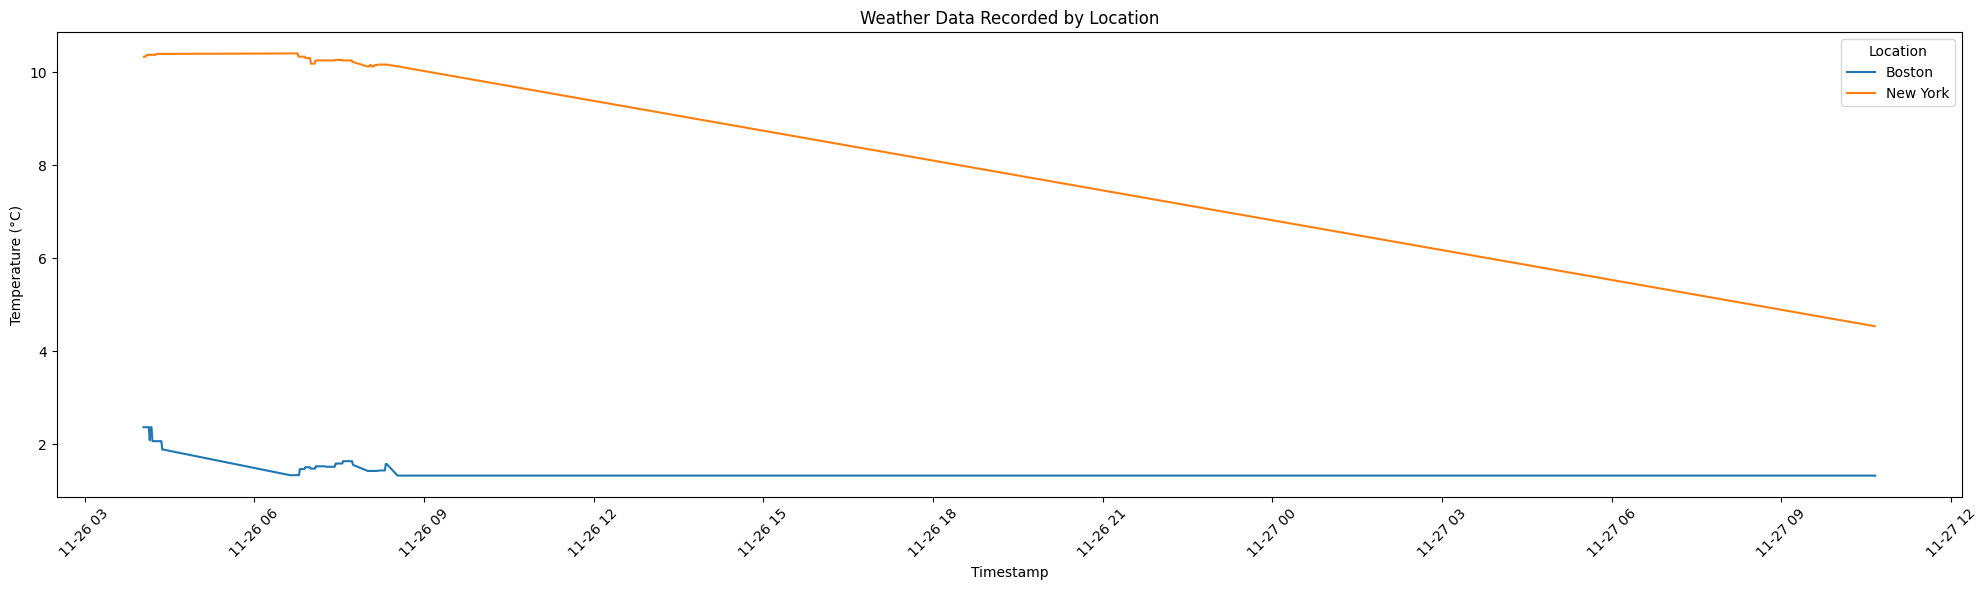

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,6))

# Group the data by 'location' and plot the temperature for each location
for location, group in weather.groupby('location'):
    # Convert temperature from Kelvin to Celsius
    group['temp_celsius'] = group['temp'] - 273.15
    plt.plot(group['forecast_timestamp'], group['temp_celsius'], label=location)

plt.xlabel("Timestamp")
plt.ylabel("Temperature (°C)")  # Update label to Celsius
plt.title("Weather Data Recorded by Location")
plt.legend(title='Location')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- **Boston**: The temperature remains consistently low, around 2°C throughout the time series, indicating colder conditions compared to New York.
- **New York**: The temperature starts at around 10°C and gradually decreases over time. This indicates a cooling trend throughout the observation period.

## Faker Report
#### Feature descriptions

| Feature                | Description                                                                                            |
|------------------------|--------------------------------------------------------------------------------------------------------|
| **ssn**                | Social Security Number (SSN)                                                                           |
| **address**            | The physical address of the individual                                                                 |
| **city**               | The city in which the individual resides                                                               |
| **country**            | The country where the individual resides                                                               |
| **credit_card_number** | The number of the credit card used by the individual                                                   |
| **credit_card_provider** | The provider or brand of the credit card                                                             |
| **email**              | The individual's email address                                                                         |
| **name**               | Full name of the individual, including title and any professional designation                          |
| **phone_number**       | The individual's phone number, including extensions if applicable                                      |
| **year**               | The year associated with the record, potentially indicating the year the record was created or updated |


In [14]:
faker = getFakerDF()
faker.head()

fakerdata


,ssn,address,city,country,credit_card_number,credit_card_provider,email,name,phone_number,year
0,278-70-2080,"PSC 1105, Box 8851\nAPO AE 12203",Smithview,Lao People's Democratic Republic,4211825052118335,JCB 16 digit,dangibson@example.org,Veronica Horne,001-347-284-3349x86219,1972
1,298-15-2847,Unit 9274 Box 3685\nDPO AE 02193,South Regina,Finland,4969630533254152,VISA 19 digit,hollanddavid@example.com,Mrs. Casey Baker DVM,3169015110,1989
2,791-63-3464,"81113 Houston Cliffs\nNew Steve, VI 73381",Ballfurt,Libyan Arab Jamahiriya,4427741533492,VISA 13 digit,waltonheather@example.org,Todd Welch,257.452.8565x79882,2003
3,869-18-1261,"4367 Kim Unions\nKellyburgh, MO 57220",Thomasbury,Haiti,4683250991170,VISA 16 digit,drhodes@example.com,Carrie Hunt,+1-985-534-2178x420,2005
4,823-92-8118,"8183 Brown Way Apt. 721\nWileystad, NH 45035",North Sandraside,Afghanistan,6011441427809900,Discover,taylor98@example.org,Timothy Johnson,921.599.2047x458,2017


In [15]:
faker.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3290 entries, 0 to 3289
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ssn                   3290 non-null   object
 1   address               3290 non-null   object
 2   city                  3290 non-null   object
 3   country               3290 non-null   object
 4   credit_card_number    3290 non-null   object
 5   credit_card_provider  3290 non-null   object
 6   email                 3290 non-null   object
 7   name                  3290 non-null   object
 8   phone_number          3290 non-null   object
 9   year                  3290 non-null   int64 
dtypes: int64(1), object(9)
memory usage: 257.2+ KB


## Codeforces Report
#### Feature descriptions

| **Feature**          | **Description**                                                                                                                      |
|----------------------|--------------------------------------------------------------------------------------------------------------------------------------|
| **handle**             | The unique username or handle of the user on Codeforces.                                                                             |
| **contribution**       | The number of contributions the user has made.                                                                                       |
| **country**            | The country where the user is from. If unavailable, this field may be `None`.                                                        |
| **last_online_time**   | The Unix timestamp of the last time the user was online on Codeforces.                                                               |
| **max_rank**           | The highest rank the user has ever achieved on Codeforces (e.g., `pupil`, `specialist`, `newbie`).                                   |
| **max_rating**         | The highest rating the user has ever achieved.                                                                                       |
| **rank**               | The user's current rank on Codeforces (e.g., `pupil`, `specialist`, `newbie`).                                                       |
| **rating**             | The user's current rating on Codeforces.                                                                                             |
| **registration_time**  | The Unix timestamp of when the user registered on Codeforces.                                                                        |


In [20]:
codeforces = getCodeforcesDF()
codeforces.head()

,handle,contribution,country,last_online_time,max_rank,max_rating,rank,rating,registration_time
0,gagan_4656,0,India,1732428716,pupil,1305,pupil,1253,1720714422
1,_doppelganger_,0,None,1731920939,specialist,1437,pupil,1255,1557899377
2,rdj68,0,None,1732196214,newbie,1037,newbie,976,1715446447
3,MountainSide,0,None,1731312839,newbie,487,newbie,487,1591350632
4,Twits10,0,None,1732372170,newbie,1036,newbie,963,1692366341


In [21]:
codeforces.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   handle             5434 non-null   object
 1   contribution       5434 non-null   int64 
 2   country            2041 non-null   object
 3   last_online_time   5434 non-null   int64 
 4   max_rank           5434 non-null   object
 5   max_rating         5434 non-null   int64 
 6   rank               5434 non-null   object
 7   rating             5434 non-null   int64 
 8   registration_time  5434 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 382.2+ KB


#### Rating Distribution in Codeforces

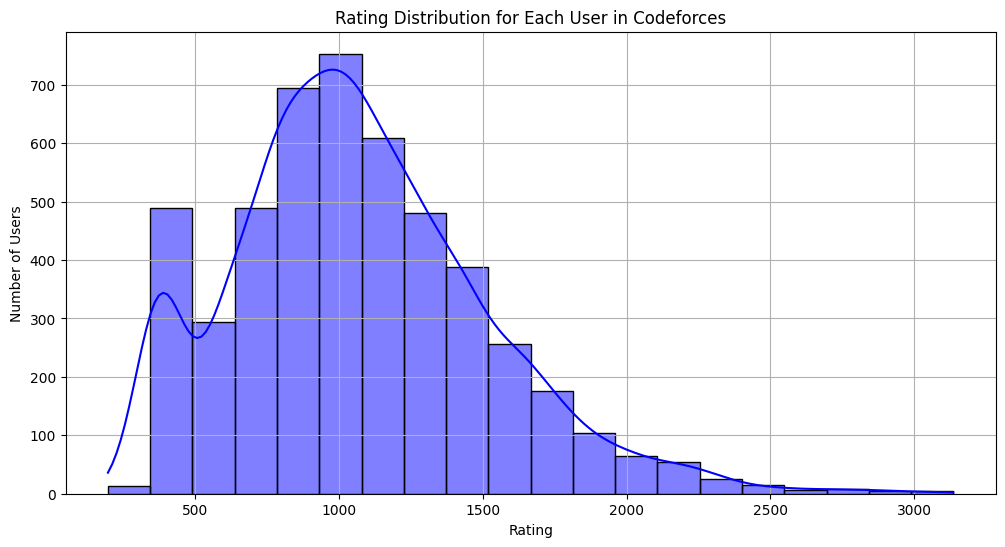

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creating the DataFrame
df = pd.DataFrame(codeforces)

# Plot 1: Rating Distribution (Histogram)
plt.figure(figsize=(12, 6))
sns.histplot(df['rating'], kde=True, bins=20, color='blue')
plt.title('Rating Distribution for Each User in Codeforces')
plt.xlabel('Rating')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

The above graph illusatrate the distribution of the rating of the users in Codeforces. 

The `x-axis` represents the rating of the users while the `y-axis` reflects the number of users with that rating. 

Looking at the above graph, we can see that the distribution is right-skewed, with the majority of users cluster around lower ratings. The most prominent peak in the graph above occurs at around rating **1000-1200**, indicating most of the users fall within this rating. 
Beyond the rating **2000**, there is a common trend that when the ratings increase, the number of users decreases significantly, implying that higher ratings are achieved by a small fraction of participants. 

#### Ranks Distribution in Codeforces
##### Codeforces Ranks and Ratings

| Rank                      | Rating Range       |
|---------------------------|--------------------|
| **Newbie**                | 0 to 1199          |
| **Pupil**                 | 1200 to 1399       |
| **Specialist**            | 1400 to 1599       |
| **Expert**                | 1600 to 1899       |
| **Candidate Master**      | 1900 to 2099       |
| **Master**                | 2100 to 2299       |
| **International Master**  | 2300 to 2399       |
| **Grandmaster**           | 2400 to 2599       |
| **International Grandmaster** | 2600 to 2999   |
| **Legendary Grandmaster** | 3000 and above     |

/tmp/ipykernel_35/4155361866.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rank_counts.index, y=rank_counts.values, palette=rank_colors, order=filtered_rank_order)


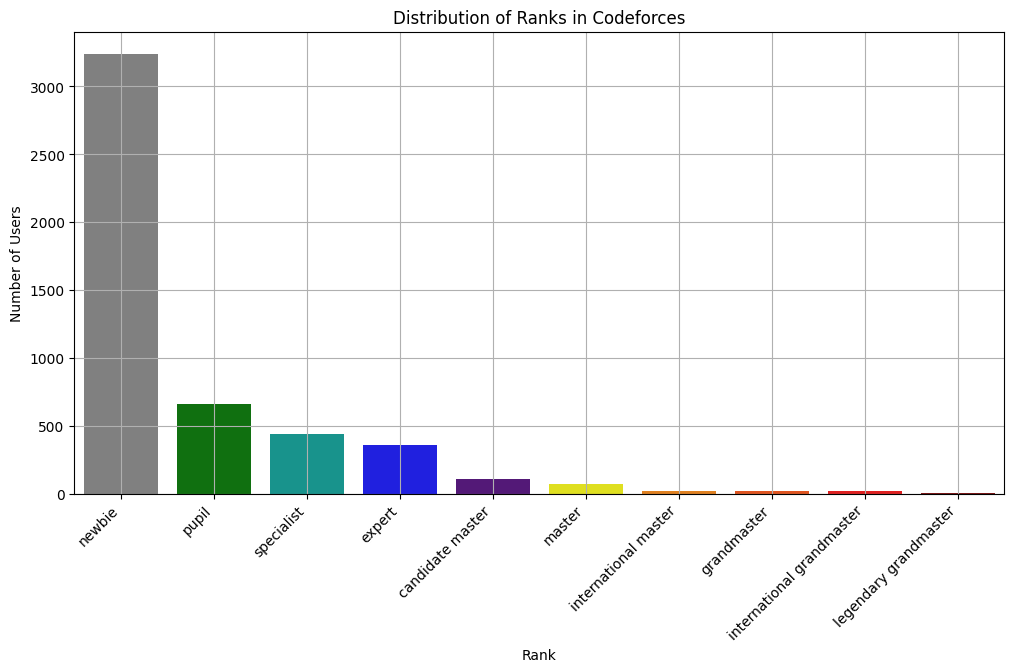

In [9]:
def apply_color_map(rank):
    return rank_color_map.get(rank, default_color)

# Define the strict order of ranks
rank_order = [
    "newbie", 
    "pupil", 
    "specialist", 
    "expert", 
    "candidate master", 
    "master", 
    "international master", 
    "grandmaster", 
    "international grandmaster", 
    "legendary grandmaster"
]

# Define color for each rank
rank_color_map = {
    "Unrated": "#000000",
    "newbie": "#808080", 
    "pupil": "#008000",  
    "specialist": "#03A89E",  
    "expert": "#0000FF",  
    "candidate master": "#570987",  
    "master": "#FFFF00", 
    "international master": "#FF8000", 
    "grandmaster": "#FF4500", 
    "international grandmaster": "#FF0000", 
    "legendary grandmaster": "#8B0000" 
}


default_color = "#D3D3D3" 

# Count the occurrences of each rank
rank_counts = df['rank'].value_counts()

# Ensure the rank distribution follows the strict order, but only include ranks that exist in rank_counts
filtered_rank_order = [rank for rank in rank_order if rank in rank_counts]

# Apply the color map to the ranks
rank_colors = [apply_color_map(rank) for rank in filtered_rank_order]

# Create a plot for rank distribution using 'hue' to assign the colors
plt.figure(figsize=(12, 6))

# Update the barplot, using the 'order' parameter to explicitly set the order of ranks
sns.barplot(x=rank_counts.index, y=rank_counts.values, palette=rank_colors, order=filtered_rank_order)

plt.title('Distribution of Ranks in Codeforces')
plt.xlabel('Rank')
plt.ylabel('Number of Users')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


The above graph illusatrate the distribution of the ranks among Codeforces users. 
Most of the users fall within the `newbie` rank, observing over 3000 particicipants. Moving to higher ranks, the number of users with corresponding ranks descrease significantly. In details, following `newbie`, the next 3 most common ranks are `pupil`, `specialist` and `expert`, achieving apporximately 600, 400 and 300, respectively. In higher ranks (`candidate master`, `master` and beyond), only a small fraction of users meet these requirements, which is less than 100. 